In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [70]:
auctions = pd.read_csv("Archivos/auctions.csv",low_memory= False);

In [71]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ GB


In [72]:
auctions['date'] = pd.to_datetime(auctions['date'])

In [73]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 GB


In [74]:
auctions.columns

Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')

In [75]:
auctions.head(5)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [76]:
auctions['auction_type_id'].value_counts()

Series([], Name: auction_type_id, dtype: int64)

In [77]:
auctions = auctions.drop(columns="auction_type_id")

In [78]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
country        int64
date           datetime64[ns]
device_id      int64
platform       int64
ref_type_id    int64
source_id      int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 895.9 MB


### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------

In [79]:
frame = auctions['device_id'].value_counts().to_frame().reset_index()

In [80]:
frame.head()

,index,device_id
0,633139769114048761,27762
1,7202276635029175071,23055
2,7298861376107043945,18188
3,6302840482782120473,16400
4,5376802567578262905,16367


In [81]:
frame_usuarios = frame.rename(columns={"index": "ref_hash"})

In [82]:
usuarios_con_una_sola_subasta = frame_usuarios.loc[frame_usuarios['device_id']==1,:]
usuarios_con_una_sola_subasta.head()

,ref_hash,device_id
183118,3284693585312643057,1
183119,6786791312444643893,1
183120,2801670127098184193,1
183121,7637482982265950004,1
183122,4213372245753102182,1


In [83]:
clicks = pd.read_csv("Archivos/clicks.csv",low_memory=False)

In [84]:
a = pd.merge(clicks, usuarios_con_una_sola_subasta, on='ref_hash', how='inner')

In [85]:
a

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,device_id
0,3,NaN,0,2019-03-10T05:40:17.612Z,6.333597e+18,1.205689,1.070234,False,4.0,EMJva9EKorcNHZCgM8FIlB6hQ6SKLo8,...,NaN,3.072849e+18,3.921844e+17,NaN,40.364,0.899,0.363,1.891515e+18,6.251876e+15,1


### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------

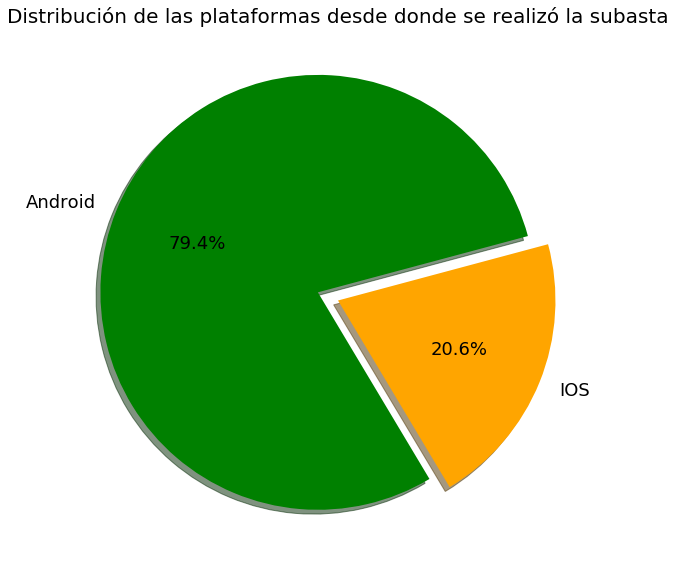

In [109]:
plot = plt.figure(figsize=(10, 10))
nombres = ['Android', 'IOS']
plot = plt.title('Distribución de las plataformas desde donde se realizó la subasta', fontsize=20)
plot = plt.pie(auctions['platform'].value_counts(), labels=nombres, autopct='%1.1f%%', startangle=15, colors=['green', 'orange'], explode=(0.1, 0),shadow = True, textprops={'fontsize': 18})
plt.show()

##### Se puede observar que los uruguayos tienen en forma mayoritaria dispositivos android, desde donde salen las subastas donde participa Jampp

### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------

In [126]:
names = auctions['source_id'].value_counts().reset_index()['index'].tolist()
sizes = auctions['source_id'].value_counts().reset_index()['source_id'].tolist()

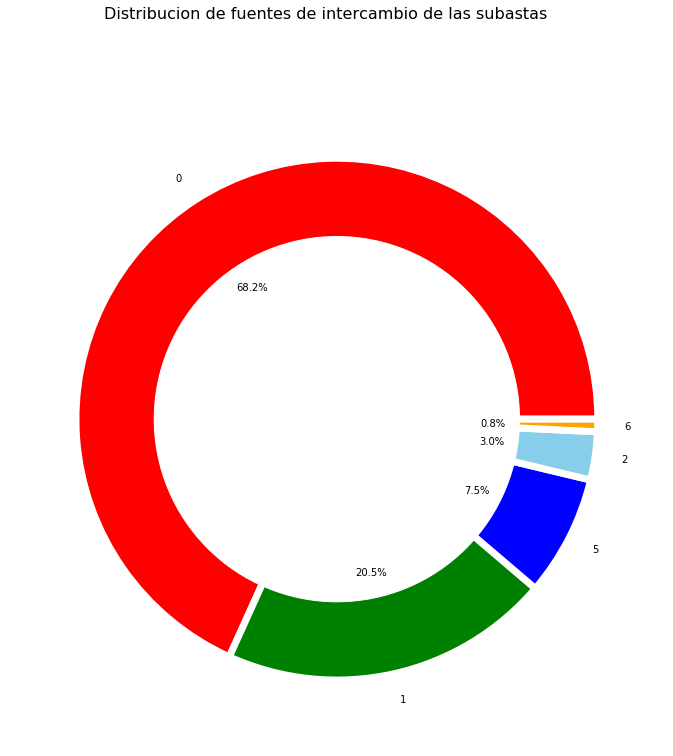

In [169]:
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(sizes, labels=names, colors=['red','green','blue','skyblue','orange'],wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
p=plt.gcf()
p.set_size_inches(12,12)
p.suptitle('Distribucion de fuentes de intercambio de las subastas', fontsize=16)

p.gca().add_artist(my_circle)
plot
plt.show()

#### En este gráfico podemos notar que con los datos provistos,  hay una cierta preferencia (ocupando un 68.2% de los intercambios) por un motor de subastas, donde seguramente Jammp hace su subasta para poder ganarse un espacio.